In [1]:
import datetime
import numpy as np
import pandas as pd
import random

%matplotlib inline

import vasu
import vasu_strategy as strategy

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
STOCK_NAME = 'JET AIRWAYS'
STOCK_PRICE_FILE = './../database/500038.csv'

In [3]:
price_data = pd.read_csv(STOCK_PRICE_FILE,index_col = 0, parse_dates = True,
                             usecols = [u'Date',u'Open Price', u'High Price', u'Low Price', u'Close Price'],
                             dtype= {u'Open Price':np.float64,u'High Price':np.float64,
                                     u'Low Price':np.float64,u'Close Price':np.float64}).sort_index()

In [4]:
sample_data = price_data.loc[datetime.date(year=2018,month=1,day=1):datetime.date(year=2018,month=3,day=25)]

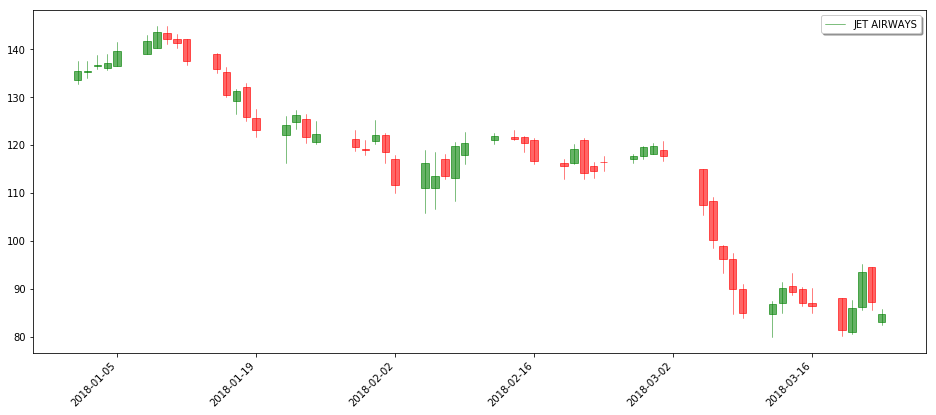

In [5]:
vasu.plot_candlestic(sample_data,STOCK_NAME)

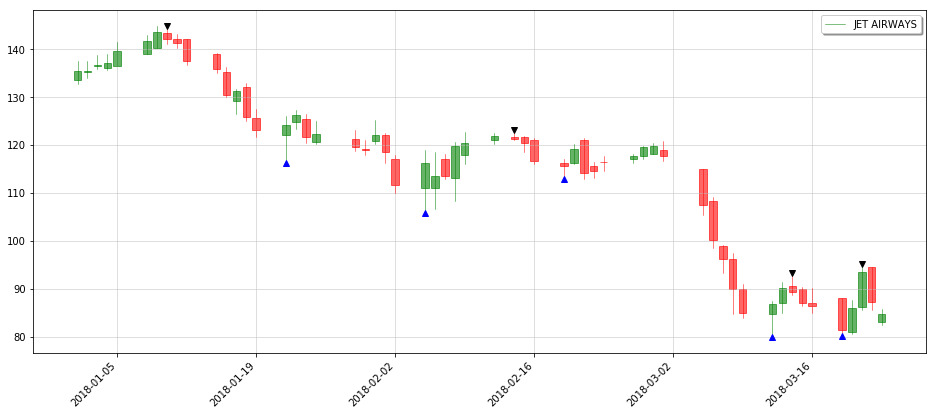

In [6]:
peak_indices = vasu.get_peak_indices(sample_data)
trough_indices = vasu.get_trough_indices(sample_data)
vasu.plot_candlestic_with_extrema(sample_data,peak_indices,trough_indices,STOCK_NAME)

In [7]:
trend_data = vasu.get_trend_data(sample_data)
train_data,test_data = vasu.split_data(trend_data)

In [9]:
strategy.detect_bearish_continuation(train_data,test_data)

{'medium_trend': 'bearish',
 'latest_peak': 'high',
 'trade': 'sell',
 'benchmark_date': datetime.datetime(2018, 3, 21, 0, 0),
 'benchmark_price': 85.5,
 'entry_date': datetime.datetime(2018, 3, 23, 0, 0)}